## Stroop Effect Investigation


In a stroop task, participants are asked to read the word of a color based on the text (congruent condition) and the time to read the list of words is recorded. In the second test, participants are asked to read the color of the word based on the text color rather than the actual text itself (incongruent condition). The text may read "BLACK" but the color of the text is red, and the participant will need to call out the "red" color instead of reading the word "BLACK". The time is recorded for the second list of words.

## 1. What is the independent variable? What is the dependent variable?

Independent variable: the word conditions of the test, congruent vs incongruent

Dependent variable: the recorded times it takes to complete the test

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

### Null Hypothesis ( $H_{0}:\mu_{1}=\mu_{2}$) 

The mean difference between the two sets of data are equal.

### Alternative Hypothesis ( $H_{1}:\mu_{1}\ne\mu_{2}$)

The average times to complete the test will not be equal. 

### Statistical Test : paired sample t-test, two-sided

The two groups we are compared are related, so we will use a paired sample t-test. This type of t-test compares two means and will give you information if the difference between these two averages are zero
The alternative condition will be two-sided since we are comparing the equality of two means.


## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [18]:
import pandas as pd
from scipy import stats as stats
import pingouin as pt
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

# read file and save to df
df = pd.read_csv('stroopdata.txt')

# showing the data
print(df)

# Showing a quick summary of statistical values for the data
df.describe()

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
#print one measure of central tendency
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [4]:
#print one measure of variable tendecy
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

## 4. Visuals that show distributions of the data


<function matplotlib.pyplot.show(close=None, block=None)>

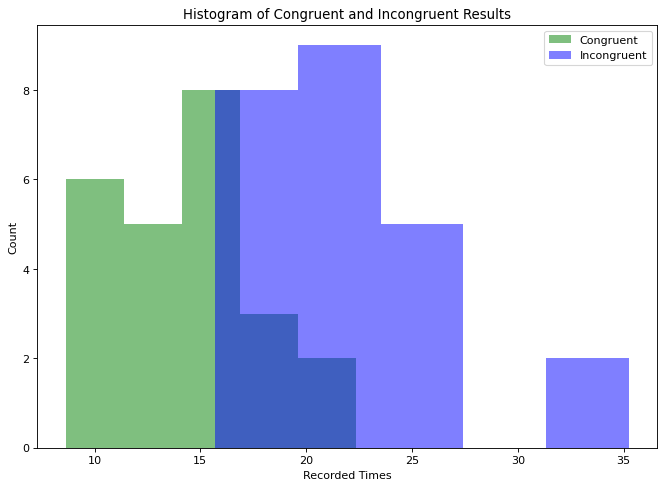

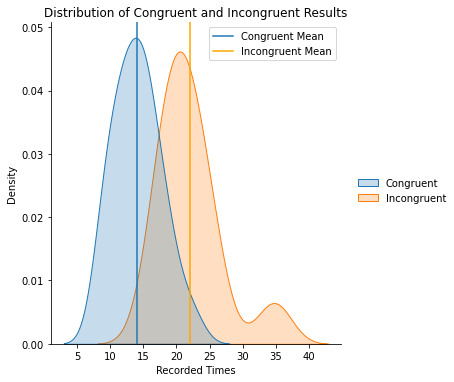

In [15]:
x1 = df["Congruent"]
x2 = df["Incongruent"]
x3= df
kwargs= dict(alpha=0.5, bins=5)

plt.figure(figsize=(10,7), dpi= 80)
plt.hist(x1, **kwargs, color='g', label='Congruent')
plt.hist(x2, **kwargs, color='b', label='Incongruent')
plt.gca().set(title='Histogram of Congruent and Incongruent Results', xlabel='Recorded Times', ylabel='Count')
plt.legend();

sns.displot(x3, kind="kde", fill="true")
plt.axvline(x = df.Congruent.mean(), label="Congruent Mean")
plt.axvline(x = df.Incongruent.mean(), color="orange", label="Incongruent Mean")
plt.gca().set(title='Distribution of Congruent and Incongruent Results', xlabel='Recorded Times')
plt.legend();
plt.show


<AxesSubplot:>

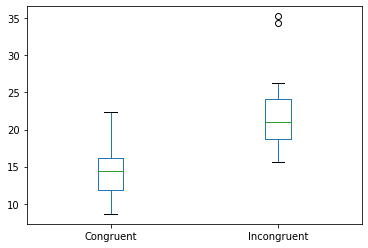

In [17]:
df.plot(kind='box')

## Observations

From the histogram we can see the overlapping data from the congruent and incongruent results. We can see that the incongruent results appear to have longer recorded times, as well as 2 outliers in the data.

From the distribution and box plot we can observe that the data appears normally distributed, and that the incongruent group has a higher mean for completed test times. We can also observe the two outliers present in the incongruent data.


## 5. Perform the statistical test and report your results

Next we will test our hypothesis using a t-test with the Pingouin package. This package provides more statistical information to test our hypothesis.

Our confidence interval is 95% and critical statistic value p = 0.05

We will run a paired sample t-test, as the two sets of observations are related.

In [13]:
#paired sample t-test
pt.ttest(df['Congruent'], df['Incongruent'], paired=True, alternative="two-sided")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.020707,23,two-sided,4.103001e-08,"[-10.02, -5.91]",1.885698,3.444e+05,1.0


### Results

From our t-test we can see that p < 0.05, allowing us to reject our null hypothesis. Further more, the Cohen-d > 0.05 indicating there is a significant effect on test times when the incongruent words condition is tested.

The Bayes factor os 3.44 indicates that there is moderate evidence to support our alternative hypothesis  $H_{1}:\mu_{1}\ne\mu_{2}$.

### References
https://www.statisticshowto.com/bayes-factor-definition/
https://pingouin-stats.org/generated/pingouin.ttest.html
https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot